In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
# Load sample dataset (digits dataset)
digits = datasets.load_digits()
X = digits.data  # Flattened image data
y = digits.target  # Labels


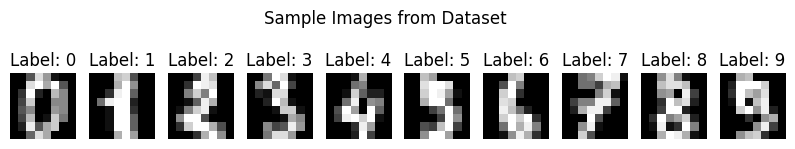

In [4]:
# Visualize some sample images from the dataset
def plot_sample_images(X, y, n_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        ax = plt.subplot(1, n_samples, i + 1)
        plt.imshow(X[i].reshape(8, 8), cmap='gray')
        plt.title(f'Label: {y[i]}')
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset')
    plt.show()

plot_sample_images(X, y, n_samples=10)


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [6]:
# Define the SVM model
model = SVC(kernel='linear', C=1)


In [7]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

In [8]:
print(f"Cross-validation accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-validation accuracy: 0.98 ± 0.01


In [9]:
# Train the model on the full training set
model.fit(X_train, y_train)


SVC(C=1, kernel='linear')

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)

In [11]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.93      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           4       0.98      1.00      0.99        54
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        54
           8       0.96      0.87      0.91        52
           9       0.95      0.96      0.95        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



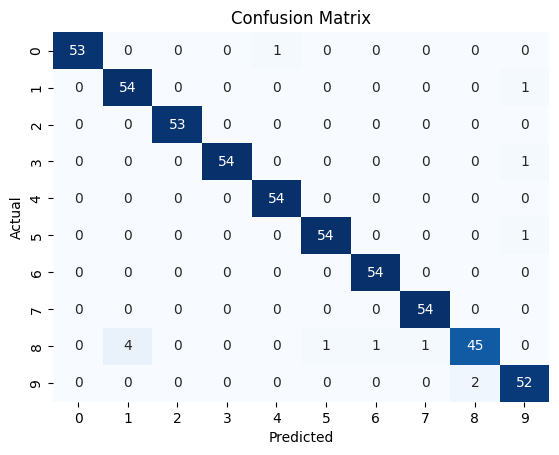

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

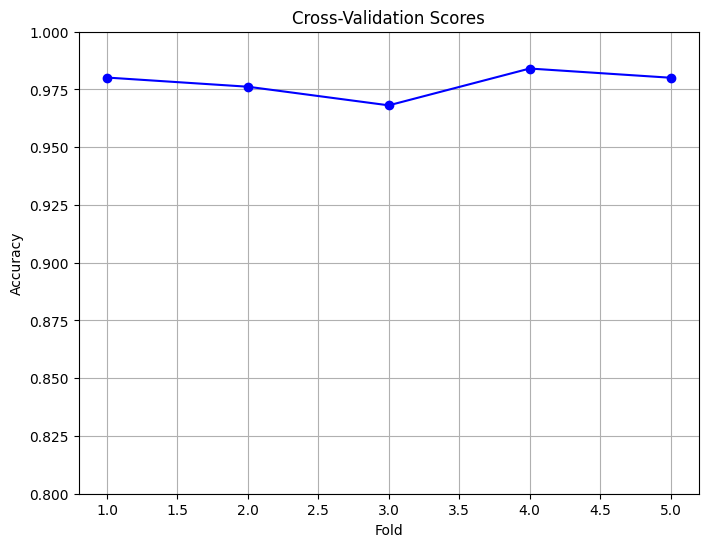

In [13]:
# Cross-validation scores plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.show()

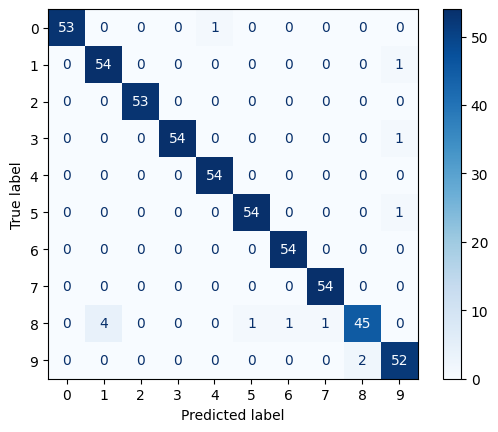

In [14]:
# Confusion Matrix Display (using sklearn's built-in function)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues')
plt.show()


In [15]:
# Visualize some predictions vs actual labels
def plot_predictions(X_test, y_test, y_pred, n_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        ax = plt.subplot(1, n_samples, i + 1)
        plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
        plt.title(f'Pred: {y_pred[i]}\nActual: {y_test[i]}')
        plt.axis('off')
    plt.suptitle('Predictions vs Actual Labels')
    plt.show()


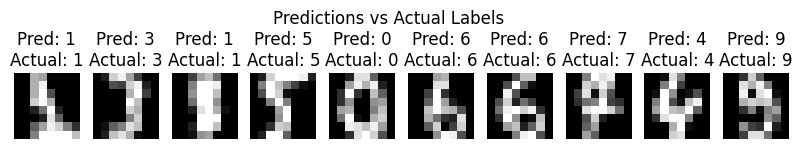

In [16]:
plot_predictions(X_test, y_test, y_pred, n_samples=10)